In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmeans2 import KMeansAlgorithm

In [3]:
"""
Load csv into pandas dataframe
"""

flname="../dataset_cluster_warehouse_exp_1.csv"
df = pd.read_csv(flname)
df

,province_name,city_name,district_name,lat_long,avg_demand_baseline,demand_target,njop_2021_min,njop_2021_max
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,"-6.1548792,106.7204645",153,230,2300.0,14000.0
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,"-6.1639643,106.7506821",387,581,3700.0,35000.0
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,"-6.1461655,106.8106198",114,171,7400.0,35400.0
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,"-6.146188,106.8079118",36,54,4700.0,35800.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,"-6.1915513,106.7481174",771,1157,7000.0,20700.0
...,...,...,...,...,...,...,...,...
63,JAWA BARAT,KOTA DEPOK,BEJI,"-6.3723053,106.7830725",378,832,NaN,NaN
64,JAWA BARAT,KOTA DEPOK,CIMANGGIS,"-6.3723053,106.7830725",231,508,NaN,NaN
65,JAWA BARAT,KOTA DEPOK,CINERE,"-6.3324008,106.7732734",495,1089,NaN,NaN
66,JAWA BARAT,KOTA DEPOK,LIMO,"-6.3663032,106.7621014",264,581,NaN,NaN


In [4]:
"""
split data lat_long into each lat and long it self.
"""

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,153,230,-6.154879,106.720465
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581,-6.163964,106.750682
2,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,114,171,-6.146166,106.810620
3,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,36,54,-6.146188,106.807912
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,-6.191551,106.748117
...,...,...,...,...,...,...
63,KOTA DEPOK,BEJI,378,832,-6.372305,106.783073
64,KOTA DEPOK,CIMANGGIS,231,508,-6.372305,106.783073
65,KOTA DEPOK,CINERE,495,1089,-6.332401,106.773273
66,KOTA DEPOK,LIMO,264,581,-6.366303,106.762101


/home/hafidabi/PycharmProjects/clustering-gudang/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hafidabi/PycharmProjects/clustering-gudang/venv/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


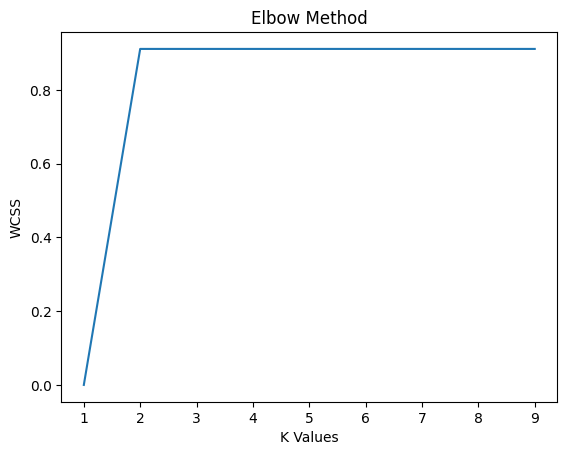

In [5]:
"""
Elbow method to determine number of cluster
"""
train_dataset = dataset[['lat', 'long']]
crange = 10
kmeans = KMeansAlgorithm(train_dataset, crange)
kmeans.fit_model(300)
kmeans.plot_elbow()

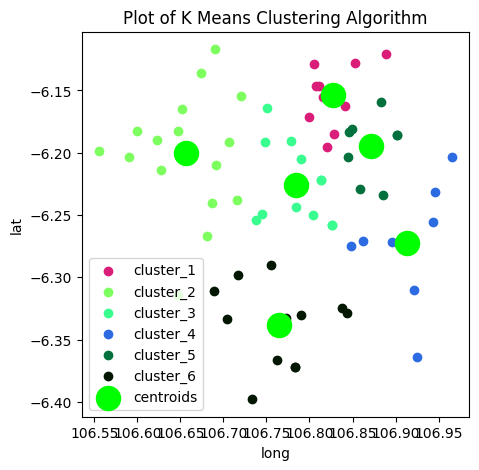

In [6]:
"""
K means clustering
"""
km = KMeansAlgorithm(train_dataset, 6)
km.fit_model(200)
km.plot_kmeans()

In [11]:
"""
Centroid and parsing format of centroid into more readable format
"""

centroid = []
for i in range(len(km.centroids[0])):
    centroid.append([km.centroids[0][i], km.centroids[1][i]])
centroid

[[-6.153957279999999, 106.82712634000002],
 [-6.20026201875, 106.656990725],
 [-6.2257079, 106.78475150833333],
 [-6.2728035124999995, 106.913227175],
 [-6.19436496, 106.87171799000001],
 [-6.338138258333333, 106.76446256666667]]

In [8]:
"""
show dataset again with its class predicition
"""

y_km = km.predict()
#assign y pred to dataset
pred_result = [0 for i in range(dataset.shape[0])]
for prediction in y_km[0].keys():
    for d in y_km[0][prediction]:
        idx = dataset[(dataset["lat"]==d[0]) & (dataset["long"]==d[1])].index.tolist()
        for id in idx:
            pred_result[id] = prediction
dataset = dataset.assign(pred=pred_result)
dataset.sort_values("pred")

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred
33,KOTA ADMINISTRASI JAKARTA UTARA,TANJUNG PRIOK,240,432,-6.127665,106.853155,1
35,KOTA ADMINISTRASI JAKARTA PUSAT,GAMBIR,276,414,-6.171504,106.800000,1
37,KOTA ADMINISTRASI JAKARTA PUSAT,KEMAYORAN,426,639,-6.162770,106.841749,1
38,KOTA ADMINISTRASI JAKARTA PUSAT,MENTENG,792,1188,-6.195169,106.820647,1
39,KOTA ADMINISTRASI JAKARTA PUSAT,SAWAH BESAR,234,351,-6.155540,106.815155,1
...,...,...,...,...,...,...,...
63,KOTA DEPOK,BEJI,378,832,-6.372305,106.783073,6
64,KOTA DEPOK,CIMANGGIS,231,508,-6.372305,106.783073,6
65,KOTA DEPOK,CINERE,495,1089,-6.332401,106.773273,6
53,KOTA TANGERANG SELATAN,CIPUTAT TIMUR,306,673,-6.297884,106.717308,6


In [9]:
#Count for silhoutte score
#Silhoutte Score


s_score = silhouette_score(train_dataset, km.labels_, metric='euclidean')
print("sihoute score is ", s_score)

AttributeError: 'KMeansAlgorithm' object has no attribute 'labels_'